In [53]:
import pandas as pd
import json
import numpy as np
import cv2
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.preprocessing import MultiLabelBinarizer

In [54]:
data=pd.read_csv('rc_card_data.csv')
data

,filename,class,Width,Height,xmin,ymin,xmax,ymax,visibility,meta,class_id
0,1cd90041-b111-4063-b576-6d549c15d210_817440.jpg,RC,1920,1080,215,163,1566,958,around_75,"{""state"": ""Delhi"", ""documentSide"": ""Front"", ""d...",1
1,1cd90041-b111-4063-b576-6d549c15d210_817439.jpg,RC,1920,1080,205,134,1659,985,around_50,"{""state"": ""Delhi"", ""documentSide"": ""Front"", ""d...",1
2,1cd90041-b111-4063-b576-6d549c15d210_817438.jpg,RC,1920,1080,214,164,1491,979,fully_visible,"{""state"": ""Haryana"", ""documentSide"": ""Front"", ...",1
3,1cd90041-b111-4063-b576-6d549c15d210_817437.jpg,RC,1920,1080,540,301,1400,838,around_75,"{""state"": ""Delhi"", ""documentSide"": ""Front"", ""d...",1
4,1cd90041-b111-4063-b576-6d549c15d210_817436.jpg,RC,1920,1080,489,238,1333,800,fully_visible,"{""state"": ""Delhi"", ""documentSide"": ""back"", ""do...",1
...,...,...,...,...,...,...,...,...,...,...,...
4910,861ba1d1-2060-4ba0-9c84-12ed7b20269b_822223.jpg,RC,1920,1080,406,222,1417,862,around_75,"{""state"": ""Delhi"", ""documentSide"": ""Front"", ""d...",1
4911,861ba1d1-2060-4ba0-9c84-12ed7b20269b_822222.jpg,RC,1920,1080,454,273,1249,783,around_75,"{""state"": ""Delhi"", ""documentSide"": ""Front"", ""d...",1
4912,861ba1d1-2060-4ba0-9c84-12ed7b20269b_822221.jpg,RC,1920,1080,381,146,1597,921,fully_visible,"{""state"": ""Delhi"", ""documentSide"": ""Front"", ""d...",1
4913,861ba1d1-2060-4ba0-9c84-12ed7b20269b_822220.jpg,RC,1920,1080,230,112,1533,916,fully_visible,"{""state"": ""Delhi"", ""documentSide"": ""Front"", ""d...",1


### Building Multi-label csv

In [55]:
df = pd.DataFrame(columns=['file_name', 'label'])

In [56]:
for i in range(len(data)):
    lab = []
    image_name = data["filename"][i]
    image_path = 'card_data/card_data/card_dataset/train/'+image_name
    image = cv2.imread(image_path)
    if image is not None:
        
        print(image_name)
        meta = data["meta"][i]
        res = json.loads(meta)
        res1 = res['documentRcType']
        
        df = df.append({'file_name' : image_name, 'label' : res1}, ignore_index=True)

1cd90041-b111-4063-b576-6d549c15d210_817440.jpg
1cd90041-b111-4063-b576-6d549c15d210_817439.jpg
1cd90041-b111-4063-b576-6d549c15d210_817438.jpg
1cd90041-b111-4063-b576-6d549c15d210_817437.jpg
1cd90041-b111-4063-b576-6d549c15d210_817436.jpg
1cd90041-b111-4063-b576-6d549c15d210_817435.jpg
1cd90041-b111-4063-b576-6d549c15d210_817434.jpg
1cd90041-b111-4063-b576-6d549c15d210_817433.jpg
1cd90041-b111-4063-b576-6d549c15d210_817432.jpg
1cd90041-b111-4063-b576-6d549c15d210_817431.jpg
b556a761-5dcd-4fe9-82bf-427e182c1c58_817430.jpg
b556a761-5dcd-4fe9-82bf-427e182c1c58_817429.jpg
b556a761-5dcd-4fe9-82bf-427e182c1c58_817428.jpg
b556a761-5dcd-4fe9-82bf-427e182c1c58_817427.jpg
b556a761-5dcd-4fe9-82bf-427e182c1c58_817426.jpg
b556a761-5dcd-4fe9-82bf-427e182c1c58_817425.jpg
b556a761-5dcd-4fe9-82bf-427e182c1c58_817424.jpg
b556a761-5dcd-4fe9-82bf-427e182c1c58_817423.jpg
b556a761-5dcd-4fe9-82bf-427e182c1c58_817422.jpg
b556a761-5dcd-4fe9-82bf-427e182c1c58_817421.jpg
db0e6a73-624c-4406-a177-a078dca2d41b_817

813b7c32-a665-465f-8a26-35ffa37b4520_817609.jpg
813b7c32-a665-465f-8a26-35ffa37b4520_817608.jpg
813b7c32-a665-465f-8a26-35ffa37b4520_817607.jpg
813b7c32-a665-465f-8a26-35ffa37b4520_817606.jpg
813b7c32-a665-465f-8a26-35ffa37b4520_817605.jpg
813b7c32-a665-465f-8a26-35ffa37b4520_817604.jpg
813b7c32-a665-465f-8a26-35ffa37b4520_817603.jpg
813b7c32-a665-465f-8a26-35ffa37b4520_817602.jpg
813b7c32-a665-465f-8a26-35ffa37b4520_817601.jpg
083647b7-77b8-49fa-b6fd-9f14612c8a15_817544.jpg
083647b7-77b8-49fa-b6fd-9f14612c8a15_817548.jpg
083647b7-77b8-49fa-b6fd-9f14612c8a15_817546.jpg
083647b7-77b8-49fa-b6fd-9f14612c8a15_817543.jpg
083647b7-77b8-49fa-b6fd-9f14612c8a15_817547.jpg
083647b7-77b8-49fa-b6fd-9f14612c8a15_817550.jpg
083647b7-77b8-49fa-b6fd-9f14612c8a15_817549.jpg
083647b7-77b8-49fa-b6fd-9f14612c8a15_817545.jpg
083647b7-77b8-49fa-b6fd-9f14612c8a15_817542.jpg
083647b7-77b8-49fa-b6fd-9f14612c8a15_817541.jpg
686266a0-1548-42f7-ad49-8b542f96d1b2_817620.jpg
686266a0-1548-42f7-ad49-8b542f96d1b2_817

3aaaa0cb-79f5-4806-8537-e676db98957f_817994.jpg
3aaaa0cb-79f5-4806-8537-e676db98957f_817993.jpg
3aaaa0cb-79f5-4806-8537-e676db98957f_817992.jpg
3aaaa0cb-79f5-4806-8537-e676db98957f_817991.jpg
314df7e0-e533-4aaa-b68b-66fa947e7347_818080.jpg
314df7e0-e533-4aaa-b68b-66fa947e7347_818079.jpg
314df7e0-e533-4aaa-b68b-66fa947e7347_818078.jpg
314df7e0-e533-4aaa-b68b-66fa947e7347_818077.jpg
314df7e0-e533-4aaa-b68b-66fa947e7347_818076.jpg
314df7e0-e533-4aaa-b68b-66fa947e7347_818075.jpg
314df7e0-e533-4aaa-b68b-66fa947e7347_818074.jpg
314df7e0-e533-4aaa-b68b-66fa947e7347_818073.jpg
314df7e0-e533-4aaa-b68b-66fa947e7347_818072.jpg
314df7e0-e533-4aaa-b68b-66fa947e7347_818071.jpg
024dc9cf-2705-4611-98b5-dd73ac975e4d_817934.jpg
024dc9cf-2705-4611-98b5-dd73ac975e4d_817940.jpg
024dc9cf-2705-4611-98b5-dd73ac975e4d_817939.jpg
024dc9cf-2705-4611-98b5-dd73ac975e4d_817938.jpg
024dc9cf-2705-4611-98b5-dd73ac975e4d_817937.jpg
024dc9cf-2705-4611-98b5-dd73ac975e4d_817936.jpg
024dc9cf-2705-4611-98b5-dd73ac975e4d_817

7dc4d336-f545-4425-9efc-4becfd6ee9bf_817865.jpg
7dc4d336-f545-4425-9efc-4becfd6ee9bf_817863.jpg
7dc4d336-f545-4425-9efc-4becfd6ee9bf_817866.jpg
7dc4d336-f545-4425-9efc-4becfd6ee9bf_817868.jpg
7dc4d336-f545-4425-9efc-4becfd6ee9bf_817870.jpg
7dc4d336-f545-4425-9efc-4becfd6ee9bf_817869.jpg
7dc4d336-f545-4425-9efc-4becfd6ee9bf_817867.jpg
7dc4d336-f545-4425-9efc-4becfd6ee9bf_817864.jpg
7dc4d336-f545-4425-9efc-4becfd6ee9bf_817862.jpg
7dc4d336-f545-4425-9efc-4becfd6ee9bf_817861.jpg
a6a5c667-9580-4bee-9bee-9a25e3a4db96_817944.jpg
a6a5c667-9580-4bee-9bee-9a25e3a4db96_817943.jpg
a6a5c667-9580-4bee-9bee-9a25e3a4db96_817948.jpg
a6a5c667-9580-4bee-9bee-9a25e3a4db96_817946.jpg
a6a5c667-9580-4bee-9bee-9a25e3a4db96_817947.jpg
a6a5c667-9580-4bee-9bee-9a25e3a4db96_817941.jpg
a6a5c667-9580-4bee-9bee-9a25e3a4db96_817950.jpg
a6a5c667-9580-4bee-9bee-9a25e3a4db96_817949.jpg
a6a5c667-9580-4bee-9bee-9a25e3a4db96_817945.jpg
a6a5c667-9580-4bee-9bee-9a25e3a4db96_817942.jpg
c1d2e053-335c-4b28-9cea-b3b759bbad5c_817

ae325ee8-67f4-4c5c-8aba-6d783f7842d9_817894.jpg
ae325ee8-67f4-4c5c-8aba-6d783f7842d9_817893.jpg
ae325ee8-67f4-4c5c-8aba-6d783f7842d9_817892.jpg
ae325ee8-67f4-4c5c-8aba-6d783f7842d9_817891.jpg
52e7aee5-142a-4315-ae76-5f3a834dc34d_818110.jpg
52e7aee5-142a-4315-ae76-5f3a834dc34d_818109.jpg
52e7aee5-142a-4315-ae76-5f3a834dc34d_818108.jpg
52e7aee5-142a-4315-ae76-5f3a834dc34d_818107.jpg
52e7aee5-142a-4315-ae76-5f3a834dc34d_818106.jpg
52e7aee5-142a-4315-ae76-5f3a834dc34d_818105.jpg
52e7aee5-142a-4315-ae76-5f3a834dc34d_818104.jpg
52e7aee5-142a-4315-ae76-5f3a834dc34d_818103.jpg
52e7aee5-142a-4315-ae76-5f3a834dc34d_818102.jpg
52e7aee5-142a-4315-ae76-5f3a834dc34d_818101.jpg
ab2c84d8-322b-41d1-81b2-6c919de0f2b9_818046.jpg
ab2c84d8-322b-41d1-81b2-6c919de0f2b9_818049.jpg
ab2c84d8-322b-41d1-81b2-6c919de0f2b9_818042.jpg
ab2c84d8-322b-41d1-81b2-6c919de0f2b9_818048.jpg
ab2c84d8-322b-41d1-81b2-6c919de0f2b9_818050.jpg
ab2c84d8-322b-41d1-81b2-6c919de0f2b9_818047.jpg
ab2c84d8-322b-41d1-81b2-6c919de0f2b9_818

25078224-d5b0-4fe9-886d-bacbfa37619c_818395.jpg
25078224-d5b0-4fe9-886d-bacbfa37619c_818398.jpg
25078224-d5b0-4fe9-886d-bacbfa37619c_818396.jpg
25078224-d5b0-4fe9-886d-bacbfa37619c_818394.jpg
25078224-d5b0-4fe9-886d-bacbfa37619c_818400.jpg
25078224-d5b0-4fe9-886d-bacbfa37619c_818399.jpg
25078224-d5b0-4fe9-886d-bacbfa37619c_818397.jpg
25078224-d5b0-4fe9-886d-bacbfa37619c_818393.jpg
25078224-d5b0-4fe9-886d-bacbfa37619c_818392.jpg
afa2536f-cf8a-47bc-8be4-c2f04de97316_818258.jpg
afa2536f-cf8a-47bc-8be4-c2f04de97316_818254.jpg
afa2536f-cf8a-47bc-8be4-c2f04de97316_818251.jpg
afa2536f-cf8a-47bc-8be4-c2f04de97316_818256.jpg
afa2536f-cf8a-47bc-8be4-c2f04de97316_818260.jpg
afa2536f-cf8a-47bc-8be4-c2f04de97316_818259.jpg
afa2536f-cf8a-47bc-8be4-c2f04de97316_818257.jpg
afa2536f-cf8a-47bc-8be4-c2f04de97316_818255.jpg
afa2536f-cf8a-47bc-8be4-c2f04de97316_818253.jpg
afa2536f-cf8a-47bc-8be4-c2f04de97316_818252.jpg
075b0370-6d38-4735-a117-53e211426b47_818330.jpg
075b0370-6d38-4735-a117-53e211426b47_818

a66786d7-b398-4104-be82-e4a22266fe44_818443.jpg
a66786d7-b398-4104-be82-e4a22266fe44_818442.jpg
a66786d7-b398-4104-be82-e4a22266fe44_818441.jpg
3061d16c-7aef-4512-9f3f-b7d92e4d4f49_818520.jpg
3061d16c-7aef-4512-9f3f-b7d92e4d4f49_818519.jpg
3061d16c-7aef-4512-9f3f-b7d92e4d4f49_818518.jpg
3061d16c-7aef-4512-9f3f-b7d92e4d4f49_818517.jpg
3061d16c-7aef-4512-9f3f-b7d92e4d4f49_818516.jpg
3061d16c-7aef-4512-9f3f-b7d92e4d4f49_818515.jpg
3061d16c-7aef-4512-9f3f-b7d92e4d4f49_818514.jpg
3061d16c-7aef-4512-9f3f-b7d92e4d4f49_818513.jpg
3061d16c-7aef-4512-9f3f-b7d92e4d4f49_818512.jpg
3061d16c-7aef-4512-9f3f-b7d92e4d4f49_818511.jpg
076bce7e-3878-48d0-8292-c1dded926475_818638.jpg
076bce7e-3878-48d0-8292-c1dded926475_818634.jpg
076bce7e-3878-48d0-8292-c1dded926475_818637.jpg
076bce7e-3878-48d0-8292-c1dded926475_818632.jpg
076bce7e-3878-48d0-8292-c1dded926475_818636.jpg
076bce7e-3878-48d0-8292-c1dded926475_818631.jpg
076bce7e-3878-48d0-8292-c1dded926475_818640.jpg
076bce7e-3878-48d0-8292-c1dded926475_818

f0d59e68-25f5-49d6-af01-8e18e3cae072_818588.jpg
f0d59e68-25f5-49d6-af01-8e18e3cae072_818587.jpg
f0d59e68-25f5-49d6-af01-8e18e3cae072_818584.jpg
85271914-bdec-4061-b236-0c7a1c3b500d_818720.jpg
85271914-bdec-4061-b236-0c7a1c3b500d_818719.jpg
85271914-bdec-4061-b236-0c7a1c3b500d_818718.jpg
85271914-bdec-4061-b236-0c7a1c3b500d_818717.jpg
85271914-bdec-4061-b236-0c7a1c3b500d_818716.jpg
85271914-bdec-4061-b236-0c7a1c3b500d_818715.jpg
85271914-bdec-4061-b236-0c7a1c3b500d_818714.jpg
85271914-bdec-4061-b236-0c7a1c3b500d_818713.jpg
85271914-bdec-4061-b236-0c7a1c3b500d_818712.jpg
b403a376-2c98-4f72-9afb-4e8fae70e3f6_818680.jpg
b403a376-2c98-4f72-9afb-4e8fae70e3f6_818679.jpg
b403a376-2c98-4f72-9afb-4e8fae70e3f6_818678.jpg
b403a376-2c98-4f72-9afb-4e8fae70e3f6_818676.jpg
b403a376-2c98-4f72-9afb-4e8fae70e3f6_818675.jpg
b403a376-2c98-4f72-9afb-4e8fae70e3f6_818674.jpg
b403a376-2c98-4f72-9afb-4e8fae70e3f6_818673.jpg
b403a376-2c98-4f72-9afb-4e8fae70e3f6_818672.jpg
b403a376-2c98-4f72-9afb-4e8fae70e3f6_818

99113900-6fda-4d8c-bed9-0f8b89384ff3_818752.jpg
99113900-6fda-4d8c-bed9-0f8b89384ff3_818751.jpg
99113900-6fda-4d8c-bed9-0f8b89384ff3_818753.jpg
09e865b3-d19f-44d1-9abe-7c5a8d54ccde_818840.jpg
09e865b3-d19f-44d1-9abe-7c5a8d54ccde_818839.jpg
09e865b3-d19f-44d1-9abe-7c5a8d54ccde_818838.jpg
09e865b3-d19f-44d1-9abe-7c5a8d54ccde_818837.jpg
09e865b3-d19f-44d1-9abe-7c5a8d54ccde_818836.jpg
09e865b3-d19f-44d1-9abe-7c5a8d54ccde_818835.jpg
09e865b3-d19f-44d1-9abe-7c5a8d54ccde_818834.jpg
09e865b3-d19f-44d1-9abe-7c5a8d54ccde_818833.jpg
09e865b3-d19f-44d1-9abe-7c5a8d54ccde_818832.jpg
09e865b3-d19f-44d1-9abe-7c5a8d54ccde_818831.jpg
1641f1bd-1df1-4f87-a225-face32f4fb79_818826.jpg
1641f1bd-1df1-4f87-a225-face32f4fb79_818830.jpg
1641f1bd-1df1-4f87-a225-face32f4fb79_818829.jpg
1641f1bd-1df1-4f87-a225-face32f4fb79_818828.jpg
1641f1bd-1df1-4f87-a225-face32f4fb79_818827.jpg
1641f1bd-1df1-4f87-a225-face32f4fb79_818824.jpg
1641f1bd-1df1-4f87-a225-face32f4fb79_818825.jpg
1641f1bd-1df1-4f87-a225-face32f4fb79_818

68eabad0-627e-4433-a00e-1a84054621d2_818903.jpg
68eabad0-627e-4433-a00e-1a84054621d2_818901.jpg
48d2ed51-45f7-4d66-9830-fbe5c79351b0_819006.jpg
48d2ed51-45f7-4d66-9830-fbe5c79351b0_819010.jpg
48d2ed51-45f7-4d66-9830-fbe5c79351b0_819009.jpg
48d2ed51-45f7-4d66-9830-fbe5c79351b0_819008.jpg
48d2ed51-45f7-4d66-9830-fbe5c79351b0_819007.jpg
48d2ed51-45f7-4d66-9830-fbe5c79351b0_819005.jpg
48d2ed51-45f7-4d66-9830-fbe5c79351b0_819004.jpg
48d2ed51-45f7-4d66-9830-fbe5c79351b0_819003.jpg
48d2ed51-45f7-4d66-9830-fbe5c79351b0_819002.jpg
48d2ed51-45f7-4d66-9830-fbe5c79351b0_819001.jpg
3c0dcf68-7ade-46d8-a92e-a1488ed948c3_819020.jpg
3c0dcf68-7ade-46d8-a92e-a1488ed948c3_819019.jpg
3c0dcf68-7ade-46d8-a92e-a1488ed948c3_819017.jpg
3c0dcf68-7ade-46d8-a92e-a1488ed948c3_819016.jpg
3c0dcf68-7ade-46d8-a92e-a1488ed948c3_819015.jpg
3c0dcf68-7ade-46d8-a92e-a1488ed948c3_819014.jpg
3c0dcf68-7ade-46d8-a92e-a1488ed948c3_819013.jpg
3c0dcf68-7ade-46d8-a92e-a1488ed948c3_819012.jpg
3c0dcf68-7ade-46d8-a92e-a1488ed948c3_819

47632300-478f-465a-96db-fb4c87be633a_819249.jpg
47632300-478f-465a-96db-fb4c87be633a_819247.jpg
47632300-478f-465a-96db-fb4c87be633a_819246.jpg
47632300-478f-465a-96db-fb4c87be633a_819245.jpg
47632300-478f-465a-96db-fb4c87be633a_819243.jpg
47632300-478f-465a-96db-fb4c87be633a_819241.jpg
7fa5d9ec-a71d-4c0e-b77b-046a8c460a8c_819140.jpg
7fa5d9ec-a71d-4c0e-b77b-046a8c460a8c_819139.jpg
7fa5d9ec-a71d-4c0e-b77b-046a8c460a8c_819138.jpg
7fa5d9ec-a71d-4c0e-b77b-046a8c460a8c_819137.jpg
7fa5d9ec-a71d-4c0e-b77b-046a8c460a8c_819136.jpg
7fa5d9ec-a71d-4c0e-b77b-046a8c460a8c_819135.jpg
7fa5d9ec-a71d-4c0e-b77b-046a8c460a8c_819134.jpg
7fa5d9ec-a71d-4c0e-b77b-046a8c460a8c_819133.jpg
7fa5d9ec-a71d-4c0e-b77b-046a8c460a8c_819132.jpg
7fa5d9ec-a71d-4c0e-b77b-046a8c460a8c_819131.jpg
03136710-93b2-418f-80ee-ed18806ee0fc_819160.jpg
03136710-93b2-418f-80ee-ed18806ee0fc_819159.jpg
03136710-93b2-418f-80ee-ed18806ee0fc_819158.jpg
03136710-93b2-418f-80ee-ed18806ee0fc_819156.jpg
03136710-93b2-418f-80ee-ed18806ee0fc_819

48c995fe-aed9-4ae1-b306-39eed2b480a3_819410.jpg
48c995fe-aed9-4ae1-b306-39eed2b480a3_819409.jpg
48c995fe-aed9-4ae1-b306-39eed2b480a3_819408.jpg
48c995fe-aed9-4ae1-b306-39eed2b480a3_819407.jpg
48c995fe-aed9-4ae1-b306-39eed2b480a3_819406.jpg
48c995fe-aed9-4ae1-b306-39eed2b480a3_819405.jpg
48c995fe-aed9-4ae1-b306-39eed2b480a3_819404.jpg
48c995fe-aed9-4ae1-b306-39eed2b480a3_819403.jpg
48c995fe-aed9-4ae1-b306-39eed2b480a3_819402.jpg
48c995fe-aed9-4ae1-b306-39eed2b480a3_819401.jpg
ffd8fef6-8795-4fd0-b735-99ab81f8b042_819360.jpg
ffd8fef6-8795-4fd0-b735-99ab81f8b042_819359.jpg
ffd8fef6-8795-4fd0-b735-99ab81f8b042_819358.jpg
ffd8fef6-8795-4fd0-b735-99ab81f8b042_819357.jpg
ffd8fef6-8795-4fd0-b735-99ab81f8b042_819356.jpg
ffd8fef6-8795-4fd0-b735-99ab81f8b042_819355.jpg
ffd8fef6-8795-4fd0-b735-99ab81f8b042_819354.jpg
ffd8fef6-8795-4fd0-b735-99ab81f8b042_819353.jpg
ffd8fef6-8795-4fd0-b735-99ab81f8b042_819352.jpg
ffd8fef6-8795-4fd0-b735-99ab81f8b042_819351.jpg
3d95cdc4-9d40-4e54-8414-0fad3c96f7ca_819

c45738a5-3d22-433a-9a1b-fd380ca51377_819469.jpg
c45738a5-3d22-433a-9a1b-fd380ca51377_819468.jpg
c45738a5-3d22-433a-9a1b-fd380ca51377_819467.jpg
c45738a5-3d22-433a-9a1b-fd380ca51377_819466.jpg
c45738a5-3d22-433a-9a1b-fd380ca51377_819465.jpg
c45738a5-3d22-433a-9a1b-fd380ca51377_819464.jpg
c45738a5-3d22-433a-9a1b-fd380ca51377_819463.jpg
c45738a5-3d22-433a-9a1b-fd380ca51377_819462.jpg
c45738a5-3d22-433a-9a1b-fd380ca51377_819461.jpg
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819575.jpg
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819572.jpg
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819574.jpg
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819573.jpg
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819580.jpg
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819579.jpg
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819578.jpg
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819577.jpg
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819576.jpg
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819571.jpg
deff6c77-6b39-44b5-86a4-563f13cd9654_819510.jpg
deff6c77-6b39-44b5-86a4-563f13cd9654_819

fe7a0771-a438-493c-a7a5-402babd42ff7_819665.jpg
fe7a0771-a438-493c-a7a5-402babd42ff7_819662.jpg
fe7a0771-a438-493c-a7a5-402babd42ff7_819661.jpg
5157d6a2-521e-4334-a0cc-bb78df5d83ee_819730.jpg
5157d6a2-521e-4334-a0cc-bb78df5d83ee_819729.jpg
5157d6a2-521e-4334-a0cc-bb78df5d83ee_819728.jpg
5157d6a2-521e-4334-a0cc-bb78df5d83ee_819727.jpg
5157d6a2-521e-4334-a0cc-bb78df5d83ee_819726.jpg
5157d6a2-521e-4334-a0cc-bb78df5d83ee_819725.jpg
5157d6a2-521e-4334-a0cc-bb78df5d83ee_819724.jpg
5157d6a2-521e-4334-a0cc-bb78df5d83ee_819723.jpg
5157d6a2-521e-4334-a0cc-bb78df5d83ee_819722.jpg
5157d6a2-521e-4334-a0cc-bb78df5d83ee_819721.jpg
d1ea0385-60ad-4775-b1dd-7a3879e97f0e_819770.jpg
d1ea0385-60ad-4775-b1dd-7a3879e97f0e_819769.jpg
d1ea0385-60ad-4775-b1dd-7a3879e97f0e_819768.jpg
d1ea0385-60ad-4775-b1dd-7a3879e97f0e_819767.jpg
d1ea0385-60ad-4775-b1dd-7a3879e97f0e_819766.jpg
d1ea0385-60ad-4775-b1dd-7a3879e97f0e_819765.jpg
d1ea0385-60ad-4775-b1dd-7a3879e97f0e_819764.jpg
d1ea0385-60ad-4775-b1dd-7a3879e97f0e_819

6bd2deb9-829d-48e2-94c5-a794aeb88342_819873.jpg
6bd2deb9-829d-48e2-94c5-a794aeb88342_819872.jpg
cc294167-180a-436d-9ef4-844ec5bdeaf4_819820.jpg
cc294167-180a-436d-9ef4-844ec5bdeaf4_819819.jpg
cc294167-180a-436d-9ef4-844ec5bdeaf4_819818.jpg
cc294167-180a-436d-9ef4-844ec5bdeaf4_819817.jpg
cc294167-180a-436d-9ef4-844ec5bdeaf4_819816.jpg
cc294167-180a-436d-9ef4-844ec5bdeaf4_819815.jpg
cc294167-180a-436d-9ef4-844ec5bdeaf4_819814.jpg
cc294167-180a-436d-9ef4-844ec5bdeaf4_819813.jpg
cc294167-180a-436d-9ef4-844ec5bdeaf4_819812.jpg
cc294167-180a-436d-9ef4-844ec5bdeaf4_819811.jpg
f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819870.jpg
f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819865.jpg
f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819869.jpg
f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819868.jpg
f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819867.jpg
f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819866.jpg
f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819864.jpg
f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819863.jpg
f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819

efe53c4a-2e7e-4a26-80f5-86246ddef38a_820008.jpg
efe53c4a-2e7e-4a26-80f5-86246ddef38a_820007.jpg
efe53c4a-2e7e-4a26-80f5-86246ddef38a_820004.jpg
efe53c4a-2e7e-4a26-80f5-86246ddef38a_820003.jpg
efe53c4a-2e7e-4a26-80f5-86246ddef38a_820002.jpg
efe53c4a-2e7e-4a26-80f5-86246ddef38a_820001.jpg
797fa52c-3e8a-46eb-a37c-c8f207c53eae_820050.jpg
797fa52c-3e8a-46eb-a37c-c8f207c53eae_820049.jpg
797fa52c-3e8a-46eb-a37c-c8f207c53eae_820048.jpg
797fa52c-3e8a-46eb-a37c-c8f207c53eae_820047.jpg
797fa52c-3e8a-46eb-a37c-c8f207c53eae_820046.jpg
797fa52c-3e8a-46eb-a37c-c8f207c53eae_820045.jpg
797fa52c-3e8a-46eb-a37c-c8f207c53eae_820044.jpg
797fa52c-3e8a-46eb-a37c-c8f207c53eae_820043.jpg
797fa52c-3e8a-46eb-a37c-c8f207c53eae_820042.jpg
797fa52c-3e8a-46eb-a37c-c8f207c53eae_820041.jpg
6c4fb2c4-9d74-44a2-a8f3-797f2bacbda8_820087.jpg
6c4fb2c4-9d74-44a2-a8f3-797f2bacbda8_820088.jpg
6c4fb2c4-9d74-44a2-a8f3-797f2bacbda8_820081.jpg
6c4fb2c4-9d74-44a2-a8f3-797f2bacbda8_820085.jpg
6c4fb2c4-9d74-44a2-a8f3-797f2bacbda8_820

7267c1af-e79a-4b99-847f-0cefd4c89820_820240.jpg
7267c1af-e79a-4b99-847f-0cefd4c89820_820239.jpg
7267c1af-e79a-4b99-847f-0cefd4c89820_820238.jpg
7267c1af-e79a-4b99-847f-0cefd4c89820_820237.jpg
7267c1af-e79a-4b99-847f-0cefd4c89820_820236.jpg
7267c1af-e79a-4b99-847f-0cefd4c89820_820235.jpg
7267c1af-e79a-4b99-847f-0cefd4c89820_820234.jpg
7267c1af-e79a-4b99-847f-0cefd4c89820_820233.jpg
7267c1af-e79a-4b99-847f-0cefd4c89820_820232.jpg
7267c1af-e79a-4b99-847f-0cefd4c89820_820231.jpg
c311f8a8-421f-43af-b8d7-2943e31d206e_820422.jpg
c311f8a8-421f-43af-b8d7-2943e31d206e_820421.jpg
c311f8a8-421f-43af-b8d7-2943e31d206e_820420.jpg
c311f8a8-421f-43af-b8d7-2943e31d206e_820420.jpg
c311f8a8-421f-43af-b8d7-2943e31d206e_820429.jpg
c311f8a8-421f-43af-b8d7-2943e31d206e_820428.jpg
c311f8a8-421f-43af-b8d7-2943e31d206e_820427.jpg
c311f8a8-421f-43af-b8d7-2943e31d206e_820426.jpg
c311f8a8-421f-43af-b8d7-2943e31d206e_820426.jpg
c311f8a8-421f-43af-b8d7-2943e31d206e_820425.jpg
c311f8a8-421f-43af-b8d7-2943e31d206e_820

add92925-dadc-4bef-9050-ebc31db7c083_820405.jpg
add92925-dadc-4bef-9050-ebc31db7c083_820404.jpg
add92925-dadc-4bef-9050-ebc31db7c083_820403.jpg
add92925-dadc-4bef-9050-ebc31db7c083_820402.jpg
add92925-dadc-4bef-9050-ebc31db7c083_820401.jpg
add92925-dadc-4bef-9050-ebc31db7c083_820400.jpg
3915f164-50ce-4d67-953e-e09c1be269e3_820310.jpg
3915f164-50ce-4d67-953e-e09c1be269e3_820309.jpg
3915f164-50ce-4d67-953e-e09c1be269e3_820308.jpg
3915f164-50ce-4d67-953e-e09c1be269e3_820307.jpg
3915f164-50ce-4d67-953e-e09c1be269e3_820306.jpg
3915f164-50ce-4d67-953e-e09c1be269e3_820305.jpg
3915f164-50ce-4d67-953e-e09c1be269e3_820304.jpg
3915f164-50ce-4d67-953e-e09c1be269e3_820303.jpg
3915f164-50ce-4d67-953e-e09c1be269e3_820302.jpg
3915f164-50ce-4d67-953e-e09c1be269e3_820301.jpg
80292d5b-5a9b-4f41-97f1-c8380b07e443_820359.jpg
80292d5b-5a9b-4f41-97f1-c8380b07e443_820358.jpg
80292d5b-5a9b-4f41-97f1-c8380b07e443_820357.jpg
80292d5b-5a9b-4f41-97f1-c8380b07e443_820356.jpg
80292d5b-5a9b-4f41-97f1-c8380b07e443_820

4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820454.jpg
4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820453.jpg
4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820453.jpg
4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820452.jpg
4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820451.jpg
4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820451.jpg
4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820450.jpg
4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820450.jpg
17a18124-ace1-42af-bd09-15de9e021b78_820439.jpg
17a18124-ace1-42af-bd09-15de9e021b78_820438.jpg
17a18124-ace1-42af-bd09-15de9e021b78_820437.jpg
17a18124-ace1-42af-bd09-15de9e021b78_820436.jpg
17a18124-ace1-42af-bd09-15de9e021b78_820435.jpg
17a18124-ace1-42af-bd09-15de9e021b78_820434.jpg
17a18124-ace1-42af-bd09-15de9e021b78_820433.jpg
17a18124-ace1-42af-bd09-15de9e021b78_820432.jpg
17a18124-ace1-42af-bd09-15de9e021b78_820431.jpg
17a18124-ace1-42af-bd09-15de9e021b78_820430.jpg
2fbd5522-e31b-45c0-90d2-856c27b32d10_820479.jpg
2fbd5522-e31b-45c0-90d2-856c27b32d10_820478.jpg
2fbd5522-e31b-45c0-90d2-856c27b32d10_820

c2266a1f-9f7b-4315-9129-cf1ef30213cc_820641.jpg
c2266a1f-9f7b-4315-9129-cf1ef30213cc_820649.jpg
c2266a1f-9f7b-4315-9129-cf1ef30213cc_820648.jpg
c2266a1f-9f7b-4315-9129-cf1ef30213cc_820647.jpg
c2266a1f-9f7b-4315-9129-cf1ef30213cc_820643.jpg
2a6a9306-f94a-4c5d-91cb-53ffc6ef75a4_820697.jpg
2a6a9306-f94a-4c5d-91cb-53ffc6ef75a4_820691.jpg
2a6a9306-f94a-4c5d-91cb-53ffc6ef75a4_820696.jpg
2a6a9306-f94a-4c5d-91cb-53ffc6ef75a4_820699.jpg
2a6a9306-f94a-4c5d-91cb-53ffc6ef75a4_820698.jpg
2a6a9306-f94a-4c5d-91cb-53ffc6ef75a4_820695.jpg
2a6a9306-f94a-4c5d-91cb-53ffc6ef75a4_820694.jpg
2a6a9306-f94a-4c5d-91cb-53ffc6ef75a4_820693.jpg
2a6a9306-f94a-4c5d-91cb-53ffc6ef75a4_820692.jpg
2a6a9306-f94a-4c5d-91cb-53ffc6ef75a4_820690.jpg
51e2c099-cc46-4f9a-97b1-518839e6a50e_820730.jpg
51e2c099-cc46-4f9a-97b1-518839e6a50e_820733.jpg
51e2c099-cc46-4f9a-97b1-518839e6a50e_820739.jpg
51e2c099-cc46-4f9a-97b1-518839e6a50e_820738.jpg
51e2c099-cc46-4f9a-97b1-518839e6a50e_820737.jpg
51e2c099-cc46-4f9a-97b1-518839e6a50e_820

9300df73-3ab0-4900-933f-2d0c964ac774_820873.jpg
9300df73-3ab0-4900-933f-2d0c964ac774_820878.jpg
9300df73-3ab0-4900-933f-2d0c964ac774_820872.jpg
9300df73-3ab0-4900-933f-2d0c964ac774_820871.jpg
9300df73-3ab0-4900-933f-2d0c964ac774_820870.jpg
0a99c3a8-f29c-46c6-92fc-516a2578f37f_820919.jpg
0a99c3a8-f29c-46c6-92fc-516a2578f37f_820918.jpg
0a99c3a8-f29c-46c6-92fc-516a2578f37f_820917.jpg
0a99c3a8-f29c-46c6-92fc-516a2578f37f_820916.jpg
0a99c3a8-f29c-46c6-92fc-516a2578f37f_820915.jpg
0a99c3a8-f29c-46c6-92fc-516a2578f37f_820914.jpg
0a99c3a8-f29c-46c6-92fc-516a2578f37f_820913.jpg
0a99c3a8-f29c-46c6-92fc-516a2578f37f_820912.jpg
0a99c3a8-f29c-46c6-92fc-516a2578f37f_820911.jpg
0a99c3a8-f29c-46c6-92fc-516a2578f37f_820910.jpg
7eda6c0a-7619-4883-b52c-1189b65320b2_820953.jpg
7eda6c0a-7619-4883-b52c-1189b65320b2_820956.jpg
7eda6c0a-7619-4883-b52c-1189b65320b2_820950.jpg
7eda6c0a-7619-4883-b52c-1189b65320b2_820958.jpg
7eda6c0a-7619-4883-b52c-1189b65320b2_820951.jpg
7eda6c0a-7619-4883-b52c-1189b65320b2_820

9a6db294-9777-4656-b02c-233e3a163665_821131.jpg
9a6db294-9777-4656-b02c-233e3a163665_821130.jpg
f3d0528e-da9b-4f58-a7e2-42264f3a37ed_821089.jpg
f3d0528e-da9b-4f58-a7e2-42264f3a37ed_821088.jpg
f3d0528e-da9b-4f58-a7e2-42264f3a37ed_821087.jpg
f3d0528e-da9b-4f58-a7e2-42264f3a37ed_821086.jpg
f3d0528e-da9b-4f58-a7e2-42264f3a37ed_821085.jpg
f3d0528e-da9b-4f58-a7e2-42264f3a37ed_821084.jpg
f3d0528e-da9b-4f58-a7e2-42264f3a37ed_821083.jpg
f3d0528e-da9b-4f58-a7e2-42264f3a37ed_821082.jpg
f3d0528e-da9b-4f58-a7e2-42264f3a37ed_821081.jpg
f3d0528e-da9b-4f58-a7e2-42264f3a37ed_821080.jpg
b9ba8d67-1274-4c84-ae9d-d5d817364e28_821129.jpg
b9ba8d67-1274-4c84-ae9d-d5d817364e28_821128.jpg
b9ba8d67-1274-4c84-ae9d-d5d817364e28_821127.jpg
b9ba8d67-1274-4c84-ae9d-d5d817364e28_821125.jpg
b9ba8d67-1274-4c84-ae9d-d5d817364e28_821124.jpg
b9ba8d67-1274-4c84-ae9d-d5d817364e28_821123.jpg
b9ba8d67-1274-4c84-ae9d-d5d817364e28_821122.jpg
b9ba8d67-1274-4c84-ae9d-d5d817364e28_821121.jpg
b9ba8d67-1274-4c84-ae9d-d5d817364e28_821

3774cf4e-3e2c-4774-b198-a1d7dd14e0e1_821187.jpg
3774cf4e-3e2c-4774-b198-a1d7dd14e0e1_821186.jpg
3774cf4e-3e2c-4774-b198-a1d7dd14e0e1_821184.jpg
3774cf4e-3e2c-4774-b198-a1d7dd14e0e1_821183.jpg
3774cf4e-3e2c-4774-b198-a1d7dd14e0e1_821182.jpg
74f32910-d422-4b46-b811-e29fac73abf8_821222.jpg
74f32910-d422-4b46-b811-e29fac73abf8_821221.jpg
74f32910-d422-4b46-b811-e29fac73abf8_821229.jpg
74f32910-d422-4b46-b811-e29fac73abf8_821228.jpg
74f32910-d422-4b46-b811-e29fac73abf8_821227.jpg
74f32910-d422-4b46-b811-e29fac73abf8_821226.jpg
74f32910-d422-4b46-b811-e29fac73abf8_821225.jpg
74f32910-d422-4b46-b811-e29fac73abf8_821224.jpg
74f32910-d422-4b46-b811-e29fac73abf8_821223.jpg
74f32910-d422-4b46-b811-e29fac73abf8_821220.jpg
9ebab075-11c5-42f4-b934-c1aac81a0b5b_821265.jpg
9ebab075-11c5-42f4-b934-c1aac81a0b5b_821267.jpg
9ebab075-11c5-42f4-b934-c1aac81a0b5b_821260.jpg
9ebab075-11c5-42f4-b934-c1aac81a0b5b_821268.jpg
9ebab075-11c5-42f4-b934-c1aac81a0b5b_821262.jpg
9ebab075-11c5-42f4-b934-c1aac81a0b5b_821

75e008fd-1cf7-4f76-a5e4-d589c55cd083_821409.jpg
75e008fd-1cf7-4f76-a5e4-d589c55cd083_821408.jpg
75e008fd-1cf7-4f76-a5e4-d589c55cd083_821407.jpg
75e008fd-1cf7-4f76-a5e4-d589c55cd083_821406.jpg
75e008fd-1cf7-4f76-a5e4-d589c55cd083_821405.jpg
9348a080-1400-4f61-8387-fa662ff38803_821481.jpg
9348a080-1400-4f61-8387-fa662ff38803_821485.jpg
9348a080-1400-4f61-8387-fa662ff38803_821483.jpg
9348a080-1400-4f61-8387-fa662ff38803_821480.jpg
9348a080-1400-4f61-8387-fa662ff38803_821489.jpg
9348a080-1400-4f61-8387-fa662ff38803_821488.jpg
9348a080-1400-4f61-8387-fa662ff38803_821487.jpg
9348a080-1400-4f61-8387-fa662ff38803_821486.jpg
9348a080-1400-4f61-8387-fa662ff38803_821484.jpg
9348a080-1400-4f61-8387-fa662ff38803_821482.jpg
2de2c450-3034-40b8-945f-a2ad4f8224b4_821624.jpg
2de2c450-3034-40b8-945f-a2ad4f8224b4_821628.jpg
2de2c450-3034-40b8-945f-a2ad4f8224b4_821629.jpg
2de2c450-3034-40b8-945f-a2ad4f8224b4_821623.jpg
2de2c450-3034-40b8-945f-a2ad4f8224b4_821627.jpg
2de2c450-3034-40b8-945f-a2ad4f8224b4_821

a951d4ff-953e-4abc-b4ee-393724ae16a4_821557.jpg
a951d4ff-953e-4abc-b4ee-393724ae16a4_821556.jpg
a951d4ff-953e-4abc-b4ee-393724ae16a4_821552.jpg
a951d4ff-953e-4abc-b4ee-393724ae16a4_821559.jpg
a951d4ff-953e-4abc-b4ee-393724ae16a4_821558.jpg
a951d4ff-953e-4abc-b4ee-393724ae16a4_821554.jpg
a951d4ff-953e-4abc-b4ee-393724ae16a4_821550.jpg
92d0d2a9-6f02-43ac-a460-2aed85786a1a_821446.jpg
92d0d2a9-6f02-43ac-a460-2aed85786a1a_821447.jpg
92d0d2a9-6f02-43ac-a460-2aed85786a1a_821449.jpg
92d0d2a9-6f02-43ac-a460-2aed85786a1a_821448.jpg
92d0d2a9-6f02-43ac-a460-2aed85786a1a_821445.jpg
92d0d2a9-6f02-43ac-a460-2aed85786a1a_821444.jpg
92d0d2a9-6f02-43ac-a460-2aed85786a1a_821443.jpg
92d0d2a9-6f02-43ac-a460-2aed85786a1a_821442.jpg
92d0d2a9-6f02-43ac-a460-2aed85786a1a_821441.jpg
92d0d2a9-6f02-43ac-a460-2aed85786a1a_821440.jpg
a1f46ca0-21fa-466e-bbef-463535bb3a80_821569.jpg
a1f46ca0-21fa-466e-bbef-463535bb3a80_821568.jpg
a1f46ca0-21fa-466e-bbef-463535bb3a80_821567.jpg
a1f46ca0-21fa-466e-bbef-463535bb3a80_821

129345e0-30b4-4dc9-9e77-2d10abc7c807_821853.jpg
129345e0-30b4-4dc9-9e77-2d10abc7c807_821852.jpg
129345e0-30b4-4dc9-9e77-2d10abc7c807_821851.jpg
129345e0-30b4-4dc9-9e77-2d10abc7c807_821849.jpg
a9d0bca2-215e-4fab-965b-611b85975eeb_821946.jpg
a9d0bca2-215e-4fab-965b-611b85975eeb_821940.jpg
a9d0bca2-215e-4fab-965b-611b85975eeb_821945.jpg
a9d0bca2-215e-4fab-965b-611b85975eeb_821944.jpg
a9d0bca2-215e-4fab-965b-611b85975eeb_821948.jpg
a9d0bca2-215e-4fab-965b-611b85975eeb_821947.jpg
a9d0bca2-215e-4fab-965b-611b85975eeb_821943.jpg
a9d0bca2-215e-4fab-965b-611b85975eeb_821942.jpg
a9d0bca2-215e-4fab-965b-611b85975eeb_821941.jpg
a9d0bca2-215e-4fab-965b-611b85975eeb_821939.jpg
c4de5666-ea93-4205-854f-2a8f77f6aef9_821808.jpg
c4de5666-ea93-4205-854f-2a8f77f6aef9_821807.jpg
c4de5666-ea93-4205-854f-2a8f77f6aef9_821806.jpg
c4de5666-ea93-4205-854f-2a8f77f6aef9_821805.jpg
c4de5666-ea93-4205-854f-2a8f77f6aef9_821804.jpg
c4de5666-ea93-4205-854f-2a8f77f6aef9_821803.jpg
c4de5666-ea93-4205-854f-2a8f77f6aef9_821

078969e2-167f-4b48-a7c4-c86031ce8b9e_821906.jpg
078969e2-167f-4b48-a7c4-c86031ce8b9e_821904.jpg
078969e2-167f-4b48-a7c4-c86031ce8b9e_821903.jpg
078969e2-167f-4b48-a7c4-c86031ce8b9e_821902.jpg
078969e2-167f-4b48-a7c4-c86031ce8b9e_821901.jpg
078969e2-167f-4b48-a7c4-c86031ce8b9e_821899.jpg
08365265-1b7b-40a5-8687-551be2bc299c_821953.jpg
08365265-1b7b-40a5-8687-551be2bc299c_821958.jpg
08365265-1b7b-40a5-8687-551be2bc299c_821957.jpg
08365265-1b7b-40a5-8687-551be2bc299c_821956.jpg
08365265-1b7b-40a5-8687-551be2bc299c_821955.jpg
08365265-1b7b-40a5-8687-551be2bc299c_821954.jpg
08365265-1b7b-40a5-8687-551be2bc299c_821952.jpg
08365265-1b7b-40a5-8687-551be2bc299c_821951.jpg
08365265-1b7b-40a5-8687-551be2bc299c_821950.jpg
08365265-1b7b-40a5-8687-551be2bc299c_821949.jpg
24c10d1c-a575-4b77-9ada-3fba2990081a_822038.jpg
24c10d1c-a575-4b77-9ada-3fba2990081a_822037.jpg
24c10d1c-a575-4b77-9ada-3fba2990081a_822036.jpg
24c10d1c-a575-4b77-9ada-3fba2990081a_822035.jpg
24c10d1c-a575-4b77-9ada-3fba2990081a_822

e14020e3-8422-475b-ad46-8e4989c2b310_822202.jpg
e14020e3-8422-475b-ad46-8e4989c2b310_822201.jpg
e14020e3-8422-475b-ad46-8e4989c2b310_822200.jpg
e14020e3-8422-475b-ad46-8e4989c2b310_822199.jpg
c783c0b4-aa7c-429b-a825-467334b2da1b_822158.jpg
c783c0b4-aa7c-429b-a825-467334b2da1b_822157.jpg
c783c0b4-aa7c-429b-a825-467334b2da1b_822156.jpg
c783c0b4-aa7c-429b-a825-467334b2da1b_822155.jpg
c783c0b4-aa7c-429b-a825-467334b2da1b_822154.jpg
c783c0b4-aa7c-429b-a825-467334b2da1b_822153.jpg
c783c0b4-aa7c-429b-a825-467334b2da1b_822152.jpg
c783c0b4-aa7c-429b-a825-467334b2da1b_822151.jpg
c783c0b4-aa7c-429b-a825-467334b2da1b_822150.jpg
c783c0b4-aa7c-429b-a825-467334b2da1b_822149.jpg
d58f488b-73bb-4c25-92d0-c04358ad873c_822111.jpg
d58f488b-73bb-4c25-92d0-c04358ad873c_822117.jpg
d58f488b-73bb-4c25-92d0-c04358ad873c_822118.jpg
d58f488b-73bb-4c25-92d0-c04358ad873c_822116.jpg
d58f488b-73bb-4c25-92d0-c04358ad873c_822115.jpg
d58f488b-73bb-4c25-92d0-c04358ad873c_822114.jpg
d58f488b-73bb-4c25-92d0-c04358ad873c_822

2e61f391-89eb-4a03-be5f-34df8bbbff61_822320.jpg
2e61f391-89eb-4a03-be5f-34df8bbbff61_822319.jpg
69dee7f4-d3b8-4053-a5ff-abc02a0ce188_822278.jpg
69dee7f4-d3b8-4053-a5ff-abc02a0ce188_822277.jpg
69dee7f4-d3b8-4053-a5ff-abc02a0ce188_822276.jpg
69dee7f4-d3b8-4053-a5ff-abc02a0ce188_822275.jpg
69dee7f4-d3b8-4053-a5ff-abc02a0ce188_822274.jpg
69dee7f4-d3b8-4053-a5ff-abc02a0ce188_822273.jpg
69dee7f4-d3b8-4053-a5ff-abc02a0ce188_822272.jpg
69dee7f4-d3b8-4053-a5ff-abc02a0ce188_822271.jpg
69dee7f4-d3b8-4053-a5ff-abc02a0ce188_822270.jpg
69dee7f4-d3b8-4053-a5ff-abc02a0ce188_822269.jpg
deab1709-d999-4fe0-bc36-7525b0e0279d_822340.jpg
deab1709-d999-4fe0-bc36-7525b0e0279d_822339.jpg
861ba1d1-2060-4ba0-9c84-12ed7b20269b_822228.jpg
861ba1d1-2060-4ba0-9c84-12ed7b20269b_822227.jpg
861ba1d1-2060-4ba0-9c84-12ed7b20269b_822226.jpg
861ba1d1-2060-4ba0-9c84-12ed7b20269b_822225.jpg
861ba1d1-2060-4ba0-9c84-12ed7b20269b_822224.jpg
861ba1d1-2060-4ba0-9c84-12ed7b20269b_822223.jpg
861ba1d1-2060-4ba0-9c84-12ed7b20269b_822

In [57]:
df['label']

0       Card
1       Card
2       Card
3       Card
4       Card
        ... 
4910    Card
4911    Card
4912    Card
4913    Card
4914    Card
Name: label, Length: 4915, dtype: object

### One Hot Encoding

In [58]:
classes = [['Card' , 'Page', 'DigiLocker']]
print("Labels:")
mlb = MultiLabelBinarizer()
mlb.fit(classes)

# Loop over all labels and show them
N_LABELS = len(mlb.classes_)
for (i, label) in enumerate(mlb.classes_):
    print("{}. {}".format(i, label))

Labels:
0. Card
1. Digi-locker
2. Page


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df['file_name'], df['label'], test_size=0.2, random_state=44)
print("Number of posters for training: ", len(X_train))
print("Number of posters for validation: ", len(X_val))

Number of posters for training:  3932
Number of posters for validation:  983


In [60]:
y_train = list(y_train)
y_val = list(y_val)
y_train[:10]

['Page',
 'Card',
 'Card',
 'Card',
 'Card',
 'Card',
 'Card',
 'Page',
 'Page',
 'Page']

### Test-train split

In [61]:
# transform the targets of the training and test sets
y_train_bin = mlb.transform(y_train)
y_val_bin = mlb.transform(y_val)

/home/rajdeep/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:878: UserWarning: unknown class(es) ['C', 'D', 'L', 'P', 'a', 'c', 'd', 'e', 'g', 'i', 'k', 'o', 'r'] will be ignored
  warnings.warn(


In [62]:
# Print example of movie posters and their binary targets
for i in range(10):
        print(X_train[i], y_train_bin[i])

1cd90041-b111-4063-b576-6d549c15d210_817440.jpg [0 0 0]
1cd90041-b111-4063-b576-6d549c15d210_817439.jpg [0 0 0]
1cd90041-b111-4063-b576-6d549c15d210_817438.jpg [0 0 0]
1cd90041-b111-4063-b576-6d549c15d210_817437.jpg [0 0 0]
1cd90041-b111-4063-b576-6d549c15d210_817436.jpg [0 0 0]
1cd90041-b111-4063-b576-6d549c15d210_817435.jpg [0 0 0]
1cd90041-b111-4063-b576-6d549c15d210_817434.jpg [0 0 0]
1cd90041-b111-4063-b576-6d549c15d210_817433.jpg [0 0 0]
1cd90041-b111-4063-b576-6d549c15d210_817432.jpg [0 0 0]
1cd90041-b111-4063-b576-6d549c15d210_817431.jpg [0 0 0]


In [63]:
IMG_SIZE = 224 # Specify height and width of image to match the input format of the model
CHANNELS = 3 # Keep RGB color channels to match the input format of the model

In [64]:
def parse_function(filename, label):
    """Function that returns a tuple of normalized image array and labels array.
    Args:
        filename: string representing path to image
        label: 0/1 one-dimensional array of size N_LABELS
    """
    filename = 'card_data/card_data/card_dataset/train/'+filename
    # Read an image from a file
    image_string = tf.io.read_file(filename)
    # Decode it into a dense vector
    image_decoded = tf.image.decode_jpeg(image_string, channels=CHANNELS)
    # Resize it to fixed shape
    image_resized = tf.image.resize(image_decoded, [IMG_SIZE, IMG_SIZE])
    # Normalize it from [0, 255] to [0.0, 1.0]
    image_normalized = image_resized / 255.0
    return image_normalized, label

### Initializing Training

In [65]:
BATCH_SIZE = 256 # Big enough to measure an F1-score
AUTOTUNE = tf.data.experimental.AUTOTUNE # Adapt preprocessing and prefetching dynamically
SHUFFLE_BUFFER_SIZE = 1024 # Shuffle the training data by a chunck of 1024 observations

In [66]:
def create_dataset(filenames, labels, is_training=True):
    """Load and parse dataset.
    Args:
        filenames: list of image paths
        labels: numpy array of shape (BATCH_SIZE, N_LABELS)
        is_training: boolean to indicate training mode
    """
    
    # Create a first dataset of file paths and labels
    dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
    # Parse and preprocess observations in parallel
    dataset = dataset.map(parse_function, num_parallel_calls=AUTOTUNE)
    
    if is_training == True:
        # This is a small dataset, only load it once, and keep it in memory.
        dataset = dataset.cache()
        # Shuffle the data each buffer size
        dataset = dataset.shuffle(buffer_size=SHUFFLE_BUFFER_SIZE)
        
    # Batch the data for multiple steps
    dataset = dataset.batch(BATCH_SIZE)
    # Fetch batches in the background while the model is training.
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    
    return dataset

In [67]:
train_ds = create_dataset(X_train, y_train_bin)
val_ds = create_dataset(X_val, y_val_bin)

In [68]:
for f, l in train_ds.take(1):
    print("Shape of features array:", f.numpy().shape)
    print("Shape of labels array:", l.numpy().shape)

Shape of features array: (256, 224, 224, 3)
Shape of labels array: (256, 3)


2022-07-06 14:53:10.629519: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [69]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(IMG_SIZE,IMG_SIZE,CHANNELS))

In [70]:
feature_extractor_layer.trainable = False
from tensorflow.keras import layers

In [100]:
model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(1024, activation='relu', name='hidden_layer1'),
    layers.Dense(N_LABELS, activation='sigmoid', name='output')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 hidden_layer1 (Dense)       (None, 1024)              1311744   
                                                                 
 output (Dense)              (None, 3)                 3075      
                                                                 
Total params: 3,572,803
Trainable params: 1,314,819
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
@tf.function
def macro_soft_f1(y, y_hat):
    """Compute the macro soft F1-score as a cost (average 1 - soft-F1 across all labels).
    Use probability values instead of binary predictions.
    
    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        
    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    y = tf.cast(y, tf.float32)
    y_hat = tf.cast(y_hat, tf.float32)
    tp = tf.reduce_sum(y_hat * y, axis=0)
    fp = tf.reduce_sum(y_hat * (1 - y), axis=0)
    fn = tf.reduce_sum((1 - y_hat) * y, axis=0)
    soft_f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    cost = 1 - soft_f1 # reduce 1 - soft-f1 in order to increase soft-f1
    macro_cost = tf.reduce_mean(cost) # average on all labels
    return macro_cost

In [73]:
@tf.function
def macro_f1(y, y_hat, thresh=0.5):
    """Compute the macro F1-score on a batch of observations (average F1 across labels)
    
    Args:
        y (int32 Tensor): labels array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        thresh: probability value above which we predict positive
        
    Returns:
        macro_f1 (scalar Tensor): value of macro F1 for the batch
    """
    y_pred = tf.cast(tf.greater(y_hat, thresh), tf.float32)
    tp = tf.cast(tf.math.count_nonzero(y_pred * y, axis=0), tf.float32)
    fp = tf.cast(tf.math.count_nonzero(y_pred * (1 - y), axis=0), tf.float32)
    fn = tf.cast(tf.math.count_nonzero((1 - y_pred) * y, axis=0), tf.float32)
    f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    macro_f1 = tf.reduce_mean(f1)
    return macro_f1

### Define Hyperparameter

In [77]:
LR = 1e-5 # Keep it small when transfer learning
EPOCHS = 10

In [78]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
  loss=macro_soft_f1,
  metrics=[macro_f1])

In [79]:
import time
start = time.time()
history = model.fit(train_ds,
                    epochs=EPOCHS,
                    validation_data=create_dataset(X_val, y_val_bin))
end = time.time()-start
print(end)



Epoch 1/10
16/16 [==============================] - 5s 257ms/step - loss: 1.0000 - macro_f1: 0.0000e+00 - val_loss: 1.0000 - val_macro_f1: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 4s 231ms/step - loss: 1.0000 - macro_f1: 0.0000e+00 - val_loss: 1.0000 - val_macro_f1: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 4s 232ms/step - loss: 1.0000 - macro_f1: 0.0000e+00 - val_loss: 1.0000 - val_macro_f1: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 4s 232ms/step - loss: 1.0000 - macro_f1: 0.0000e+00 - val_loss: 1.0000 - val_macro_f1: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 4s 231ms/step - loss: 1.0000 - macro_f1: 0.0000e+00 - val_loss: 1.0000 - val_macro_f1: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 4s 232ms/step - loss: 1.0000 - macro_f1: 0.0000e+00 - val_loss: 1.0000 - val_macro_f1: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 4s 231ms/step - loss: 1.0000 - macro_f1: 0.0000e

### 

In [80]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import multiprocessing
def learning_curves(history):
    """Plot the learning curves of loss and macro f1 score 
    for the training and validation datasets.
    
    Args:
        history: history callback of fitting a tensorflow keras model 
    """
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    macro_f1 = history.history['macro_f1']
    val_macro_f1 = history.history['val_macro_f1']
    
    epochs = len(loss)

    style.use("bmh")
    plt.figure(figsize=(8, 8))

    plt.subplot(2, 1, 1)
    plt.plot(range(1, epochs+1), loss, label='Training Loss')
    plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')

    plt.subplot(2, 1, 2)
    plt.plot(range(1, epochs+1), macro_f1, label='Training Macro F1-score')
    plt.plot(range(1, epochs+1), val_macro_f1, label='Validation Macro F1-score')
    plt.legend(loc='lower right')
    plt.ylabel('Macro F1-score')
    plt.title('Training and Validation Macro F1-score')
    plt.xlabel('epoch')

    plt.show()
    
    return loss, val_loss, macro_f1, val_macro_f1

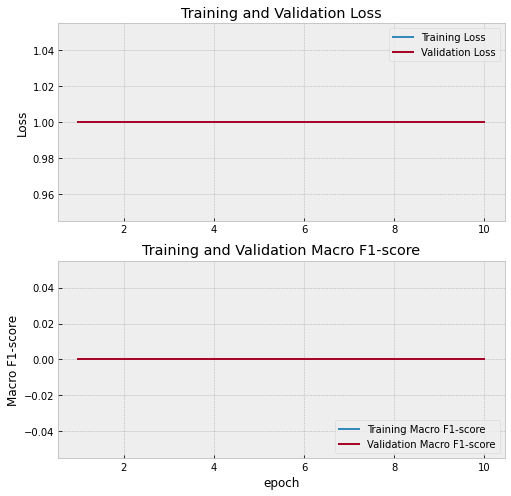

In [81]:
losses, val_losses, macro_f1s, val_macro_f1s = learning_curves(history)

In [82]:
print("Macro soft-F1 loss: %.2f" %val_losses[-1])
print("Macro F1-score: %.2f" %val_macro_f1s[-1])

Macro soft-F1 loss: 1.00
Macro F1-score: 0.00


In [83]:
def download_parallel(movies, image_dir):
    """Downloads images from Internet in parallel.
    
    Args:
        movies (dataframe): must contain 'imdbId' and 'Poster' url columns
        image_dir (string): path to destination directory
    
    Returns:
        movies (dataframe): input dataframe without posters that failed to download
    """
    
    # Create list of filenames
    filenames = movies['imdbId'].apply(lambda imbdId : os.path.join(image_dir, str(imbdId)+'.jpg'))
    # Create list of image urls
    urls = movies['Poster']

    # Create destination directory
    if os.path.exists(image_dir):
        print("Directory '{}' already exists and will be deleted.".format(image_dir))
        shutil.rmtree(image_dir)
    print("Created new directory '{}'".format(image_dir))
    os.makedirs(image_dir)
    
    # Define function to download one single image
    def download_image(url, filename):
        try:
            urllib.request.urlretrieve(url, filename)
            return 0
        except:
            return os.path.basename(filename).split('.')[0]
    
    # Download images in parallel
    start = time()
    print("\nDownloading...")
    num_cores = multiprocessing.cpu_count()
    ko_list = Parallel(n_jobs=num_cores)(delayed(download_image)(u, f) for f, u in zip(filenames, urls))
    
    print("\nDownload in parallel mode took %d seconds." %(time()-start))
    print("Success:", len([i for i in ko_list if i==0]))
    print("Errors:", len([i for i in ko_list if i!=0]))
    
    # Remove not downloaded posters from the dataframe
    ko_index = movies[movies['imdbId'].isin(ko_list)].index
    movies = movies.drop(ko_index)
    
    return movies
    

def download_sequential(movies, image_dir):
    """Downloads images from Internet sequentially.
    
    Args:
        movies (dataframe): must contain 'imdbId' and 'Poster' columns
        image_dir (string): path to destination directory
        
    Returns:
        movies (dataframe): input dataframe without posters that failed to download
    """
    
    # Create list of filenames
    filenames = movies['imdbId'].apply(lambda imbdId : os.path.join(image_dir, str(imbdId)+'.jpg'))
    # Create list of image urls
    urls = movies['Poster']

    # Create destination directory
    if os.path.exists(image_dir):
        print("Directory '{}' already exists and will be deleted.".format(image_dir))
        shutil.rmtree(image_dir)
    print("Created new directory '{}'".format(image_dir))
    os.makedirs(image_dir)
    
    # Define function to download one single image
    def download_image(image_path, filename):
        urllib.request.urlretrieve(image_path, filename)
    
    # Download images sequentially
    start = time()
    print("\nDownloading...")
    ko_list = []
    for i in tqdm(range(len(filenames))):
        filename = filenames.iloc[i]
        url = urls.iloc[i]
        try:
            download_image(url, filename)
        except:
            img_id = os.path.basename(filename).split('.')[0]
            ko_list.append(img_id)
            pass
    
    print("\nDownload in sequential mode took %d seconds." %(time()-start))
    print("Success:", (len(filenames)-len(ko_list)))
    print("Errors:", len(ko_list))
    
    # Remove not downloaded posters from the dataframe
    ko_index = movies[movies['imdbId'].isin(ko_list)].index
    movies = movies.drop(ko_index)
    
    return movies


def micro_bce(y, y_hat):
    """Compute the micro binary cross-entropy on a batch of observations.
    
    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)      
        y_hat (float32 Tensor): probability matrix output from forward propagation of shape (BATCH_SIZE, N_LABELS)
        
    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    # Convert the target array to float32
    y = tf.cast(y, tf.float32)
    # Implement cross entropy loss for each observation and label
    cross_entropy = - y * tf.math.log(tf.maximum(y_hat, 1e-16)) - (1-y) * tf.math.log(tf.maximum(1-y_hat, 1e-16))
    # Average binary cross entropy across all batch observations and labels
    cost = tf.reduce_mean(cross_entropy)
    return cost


def macro_bce(y, y_hat):
    """Compute the macro binary cross-entropy on a batch of observations (average across all labels).
    
    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)      
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        
    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    # Convert the target array to float32
    y = tf.cast(y, tf.float32)
    # Implement cross entropy loss for each observation and label
    cross_entropy = - y * tf.math.log(tf.maximum(y_hat, 1e-16)) - (1-y) * tf.math.log(tf.maximum(1-y_hat, 1e-16))
    # Average all binary cross entropy losses over the whole batch for each label
    cost = tf.reduce_mean(cross_entropy, axis=0)
    # Average all binary cross entropy losses over labels within the batch
    cost = tf.reduce_mean(cost)
    return cost


def macro_double_soft_f1(y, y_hat):
    """Compute the macro soft F1-score as a cost (average 1 - soft-F1 across all labels).
    Use probability values instead of binary predictions.
    This version uses the computation of soft-F1 for both positive and negative class for each label.
    
    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        
    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    y = tf.cast(y, tf.float32)
    y_hat = tf.cast(y_hat, tf.float32)
    tp = tf.reduce_sum(y_hat * y, axis=0)
    fp = tf.reduce_sum(y_hat * (1 - y), axis=0)
    fn = tf.reduce_sum((1 - y_hat) * y, axis=0)
    tn = tf.reduce_sum((1 - y_hat) * (1 - y), axis=0)
    soft_f1_class1 = 2*tp / (2*tp + fn + fp + 1e-16)
    soft_f1_class0 = 2*tn / (2*tn + fn + fp + 1e-16)
    cost_class1 = 1 - soft_f1_class1 # reduce 1 - soft-f1_class1 in order to increase soft-f1 on class 1
    cost_class0 = 1 - soft_f1_class0 # reduce 1 - soft-f1_class0 in order to increase soft-f1 on class 0
    cost = 0.5 * (cost_class1 + cost_class0) # take into account both class 1 and class 0
    macro_cost = tf.reduce_mean(cost) # average on all labels
    return macro_cost


def learning_curves(history):
    """Plot the learning curves of loss and macro f1 score 
    for the training and validation datasets.
    
    Args:
        history: history callback of fitting a tensorflow keras model 
    """
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    macro_f1 = history.history['macro_f1']
    val_macro_f1 = history.history['val_macro_f1']
    
    epochs = len(loss)

    style.use("bmh")
    plt.figure(figsize=(8, 8))

    plt.subplot(2, 1, 1)
    plt.plot(range(1, epochs+1), loss, label='Training Loss')
    plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')

    plt.subplot(2, 1, 2)
    plt.plot(range(1, epochs+1), macro_f1, label='Training Macro F1-score')
    plt.plot(range(1, epochs+1), val_macro_f1, label='Validation Macro F1-score')
    plt.legend(loc='lower right')
    plt.ylabel('Macro F1-score')
    plt.title('Training and Validation Macro F1-score')
    plt.xlabel('epoch')

    plt.show()
    
    return loss, val_loss, macro_f1, val_macro_f1


def perf_grid(ds, target, label_names, model, n_thresh=100):
    """Computes the performance table containing target, label names,
    label frequencies, thresholds between 0 and 1, number of tp, fp, fn,
    precision, recall and f-score metrics for each label.
    
    Args:
        ds (tf.data.Datatset): contains the features array
        target (numpy array): target matrix of shape (BATCH_SIZE, N_LABELS)
        label_names (list of strings): column names in target matrix
        model (tensorflow keras model): model to use for prediction
        n_thresh (int) : number of thresholds to try
        
    Returns:
        grid (Pandas dataframe): performance table 
    """
    
    # Get predictions
    y_hat_val = model.predict(ds)
    # Define target matrix
    y_val = target
    # Find label frequencies in the validation set
    label_freq = target.sum(axis=0)
    # Get label indexes
    label_index = [i for i in range(len(label_names))]
    # Define thresholds
    thresholds = np.linspace(0,1,n_thresh+1).astype(np.float32)
    
    # Compute all metrics for all labels
    ids, labels, freqs, tps, fps, fns, precisions, recalls, f1s = [], [], [], [], [], [], [], [], []
    for l in label_index:
        for thresh in thresholds:   
            ids.append(l)
            labels.append(label_names[l])
            freqs.append(round(label_freq[l]/len(y_val),2))
            y_hat = y_hat_val[:,l]
            y = y_val[:,l]
            y_pred = y_hat > thresh
            tp = np.count_nonzero(y_pred  * y)
            fp = np.count_nonzero(y_pred * (1-y))
            fn = np.count_nonzero((1-y_pred) * y)
            precision = tp / (tp + fp + 1e-16)
            recall = tp / (tp + fn + 1e-16)
            f1 = 2*tp / (2*tp + fn + fp + 1e-16)
            tps.append(tp)
            fps.append(fp)
            fns.append(fn)
            precisions.append(precision)
            recalls.append(recall)
            f1s.append(f1)
            
    # Create the performance dataframe
    grid = pd.DataFrame({
        'id':ids,
        'label':labels,
        'freq':freqs,
        'threshold':list(thresholds)*len(label_index),
        'tp':tps,
        'fp':fps,
        'fn':fns,
        'precision':precisions,
        'recall':recalls,
        'f1':f1s})
    
    grid = grid[['id', 'label', 'freq', 'threshold',
                 'tp', 'fn', 'fp', 'precision', 'recall', 'f1']]
    
    return grid


def print_time(t):
    """Function that converts time period in seconds into %h:%m:%s expression.
    Args:
        t (int): time period in seconds
    Returns:
        s (string): time period formatted
    """
    h = t//3600
    m = (t%3600)//60
    s = (t%3600)%60
    return '%dh:%dm:%ds'%(h,m,s)

In [84]:
import time
start = time.time()
model_bce = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(1024, activation='relu', name='hidden_layer1'),
    layers.Dense(N_LABELS, activation='sigmoid')
])

model_bce.compile(
    optimizer=tf.keras.optimizers.Adam(lr=5e-4),
    loss=tf.keras.metrics.binary_crossentropy,
    metrics=[macro_f1])
    
start = time.time()
history_bce = model_bce.fit(train_ds,
                            epochs=EPOCHS,
                            validation_data=create_dataset(X_val, y_val_bin))
print('\nTraining took {}'.format(print_time(time.time()-start)))

Epoch 1/10


/home/rajdeep/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


16/16 [==============================] - 7s 355ms/step - loss: 0.0538 - macro_f1: 0.0000e+00 - val_loss: 2.1843e-06 - val_macro_f1: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 4s 234ms/step - loss: 5.3094e-07 - macro_f1: 0.0000e+00 - val_loss: 3.5548e-07 - val_macro_f1: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 4s 231ms/step - loss: 1.5105e-07 - macro_f1: 0.0000e+00 - val_loss: 2.3975e-07 - val_macro_f1: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 4s 232ms/step - loss: 1.1715e-07 - macro_f1: 0.0000e+00 - val_loss: 2.1995e-07 - val_macro_f1: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 4s 234ms/step - loss: 1.1077e-07 - macro_f1: 0.0000e+00 - val_loss: 2.1587e-07 - val_macro_f1: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 4s 234ms/step - loss: 1.0950e-07 - macro_f1: 0.0000e+00 - val_loss: 2.1489e-07 - val_macro_f1: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 4s 233ms/step -

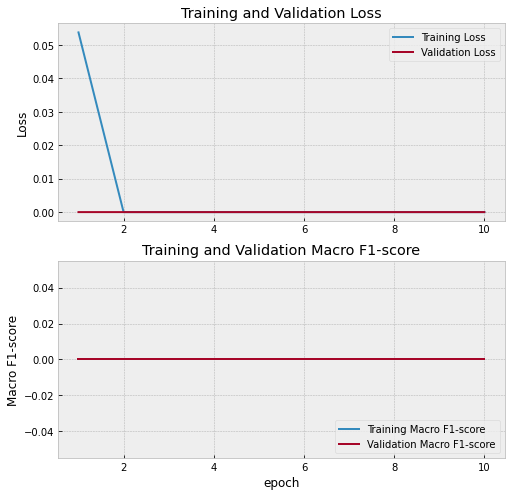

In [85]:
model_bce_losses, model_bce_val_losses, model_bce_macro_f1s, model_bce_val_macro_f1s = learning_curves(history_bce)

In [86]:
print("Macro soft-F1 loss: %.2f" %model_bce_val_losses[-1])
print("Macro F1-score: %.2f" %model_bce_val_macro_f1s[-1])

Macro soft-F1 loss: 0.00
Macro F1-score: 0.00


In [87]:
# Get all label names
label_names = mlb.classes_
# Performance table with the first model (macro soft-f1 loss)
grid = perf_grid(val_ds, y_val_bin, label_names, model)
# Performance table with the second model (binary cross-entropy loss)
grid_bce = perf_grid(val_ds, y_val_bin, label_names, model_bce)

In [88]:
grid_bce.head()

,id,label,freq,threshold,tp,fn,fp,precision,recall,f1
0,0,Card,0.0,0.00,0,0,983,0.0,0.0,0.0
1,0,Card,0.0,0.01,0,0,0,0.0,0.0,0.0
2,0,Card,0.0,0.02,0,0,0,0.0,0.0,0.0
3,0,Card,0.0,0.03,0,0,0,0.0,0.0,0.0
4,0,Card,0.0,0.04,0,0,0,0.0,0.0,0.0


In [89]:
import seaborn as sns
# Get the maximum F1-score for each label when using the second model and varying the threshold
max_perf = grid_bce.groupby(['id', 'label', 'freq'])[['f1']].max().sort_values('f1', ascending=False).reset_index()
max_perf.rename(columns={'f1':'f1max_bce'}, inplace=True)
max_perf.style.background_gradient(subset=['freq', 'f1max_bce'], cmap=sns.light_palette("lightgreen", as_cmap=True))

,id,label,freq,f1max_bce
0,0,Card,0.000000,0.000000
1,1,Digi-locker,0.000000,0.000000
2,2,Page,0.000000,0.000000


In [90]:
print("Correlation between label frequency and optimal F1 with bce: %.2f" %max_perf['freq'].corr(max_perf['f1max_bce']))

Correlation between label frequency and optimal F1 with bce: nan


In [91]:
top5 = max_perf.head(9)['id']

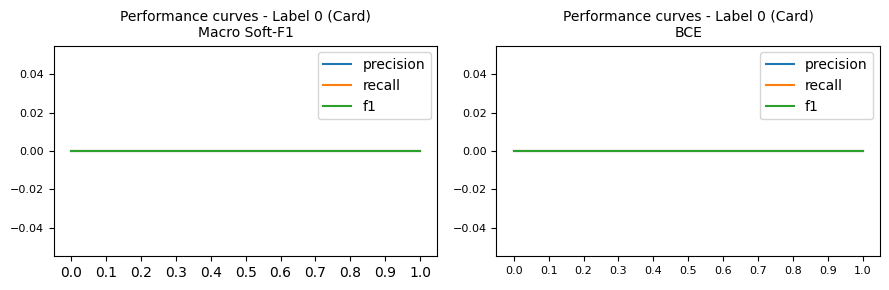

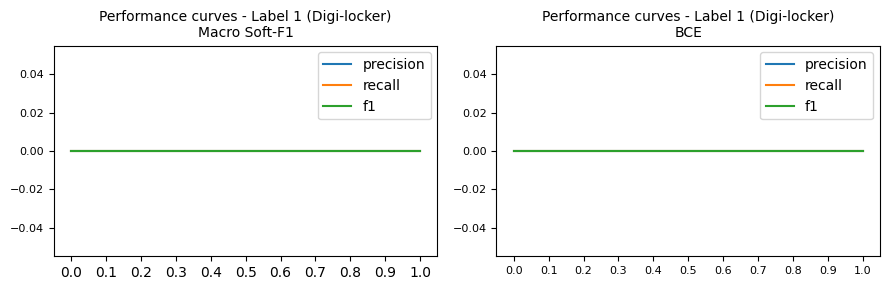

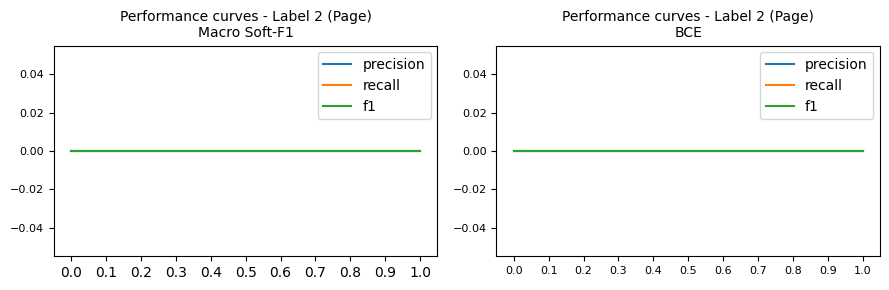

In [92]:
style.use("default")
for l in top5:
    
    label_grid = grid.loc[grid['id']==l, ['precision','recall','f1']]
    label_grid = label_grid.reset_index().drop('index', axis=1)
    
    label_grid_bce = grid_bce.loc[grid_bce['id']==l, ['precision','recall','f1']]
    label_grid_bce = label_grid_bce.reset_index().drop('index', axis=1)
    
    plt.figure(figsize=(9,3))

    ax = plt.subplot(1, 2, 1)
    plt.xticks(ticks=np.arange(0,110,10), labels=np.arange(0,110,10)/100, fontsize=10)
    plt.yticks(fontsize=8)
    plt.title('Performance curves - Label '+str(l)+' ('+label_names[l]+')\nMacro Soft-F1', fontsize=10)
    label_grid.plot(ax=ax)
    
    ax = plt.subplot(1, 2, 2)
    plt.xticks(ticks=np.arange(0,110,10), labels=np.arange(0,110,10)/100, fontsize=8)
    plt.yticks(fontsize=8)
    plt.title('Performance curves - Label '+str(l)+' ('+label_names[l]+')\nBCE', fontsize=10)
    label_grid_bce.plot(ax=ax)
    
    plt.tight_layout()
    plt.show()
    

In [93]:
# Predict on the validation set with both models
y_hat_val = model.predict(val_ds)
y_hat_val_bce = model_bce.predict(val_ds)

/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


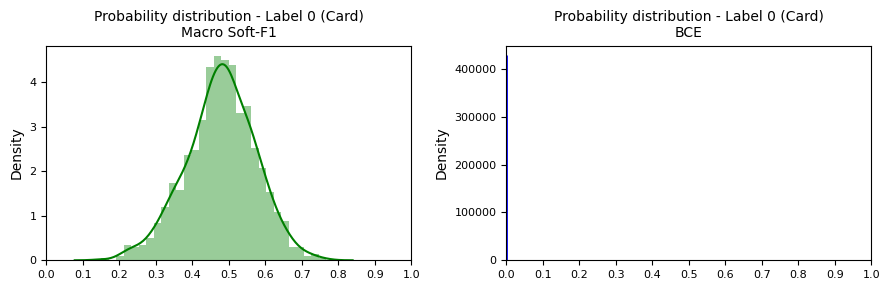

/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


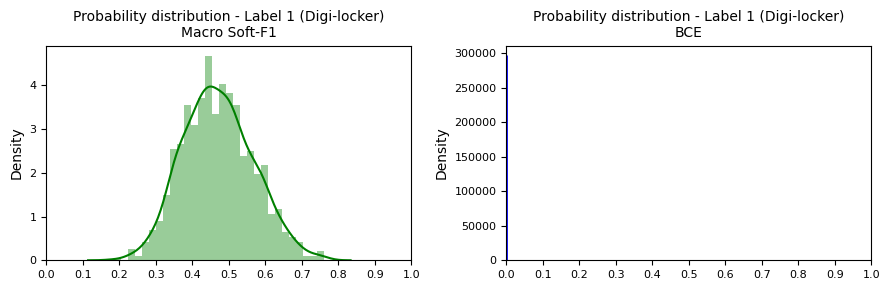

/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


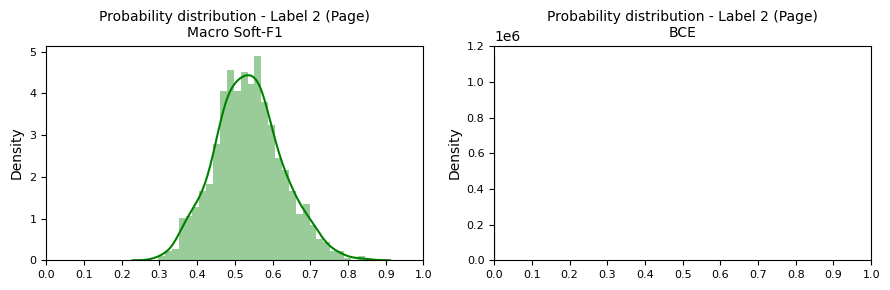

In [94]:
style.use("default")
for l in top5:
        
    plt.figure(figsize=(9,3))
    
    ax = plt.subplot(1, 2, 1)
    plt.xticks(ticks=np.arange(0,1.1,0.1), fontsize=8)
    plt.yticks(fontsize=8)
    plt.title('Probability distribution - Label '+str(l)+' ('+label_names[l]+')\nMacro Soft-F1', fontsize=10)
    plt.xlim(0,1)
    ax = sns.distplot(y_hat_val[:,l], bins=30, kde=True, color="g")
    
    ax = plt.subplot(1, 2, 2)
    plt.xticks(ticks=np.arange(0,1.1,0.1), fontsize=8)
    plt.yticks(fontsize=8)
    plt.title('Probability distribution - Label '+str(l)+' ('+label_names[l]+')\nBCE', fontsize=10)
    plt.xlim(0,1)
    ax = sns.distplot(y_hat_val_bce[:,l], bins=30, kde=True, color="b")
    
    plt.tight_layout()
    plt.show()
    

In [97]:
def show_prediction(title, movies_df, model):
    
    # Get movie info
    img_path = os.path.join('card_data/card_data/card_dataset/train/', title)
    
    # Read and prepare image
    img = image.load_img(img_path, target_size=(IMG_SIZE,IMG_SIZE,CHANNELS))
    img = image.img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)

    # Generate prediction
    prediction = (model.predict(img) > 0.5).astype('int')
    prediction = pd.Series(prediction[0])
    prediction.index = mlb.classes_
    prediction = prediction[prediction==1].index.values

    # Dispaly image with prediction
    style.use('default')
    plt.figure(figsize=(8,4))
    plt.imshow(Image.open(img_path))
    plt.title(list(prediction))
    plt.show()

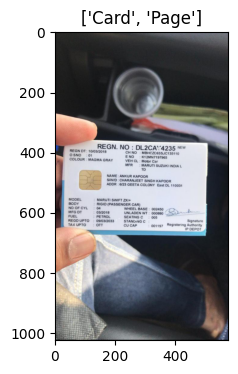

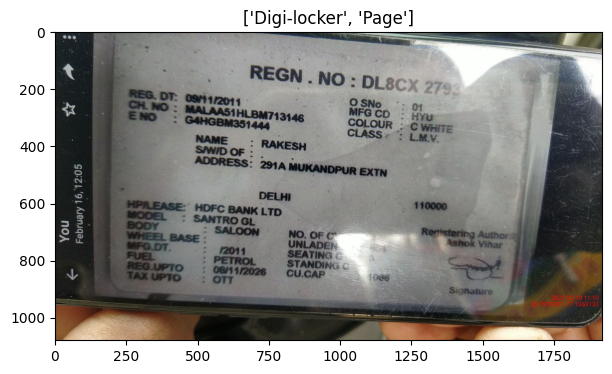

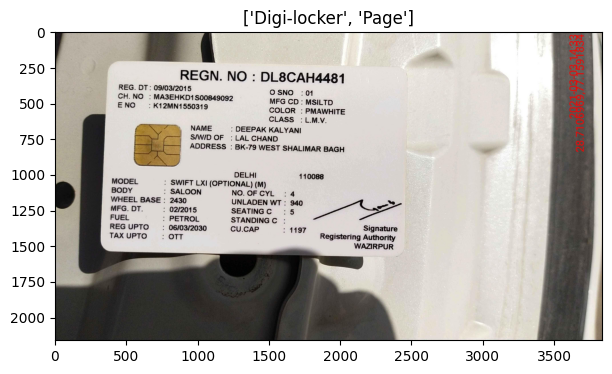

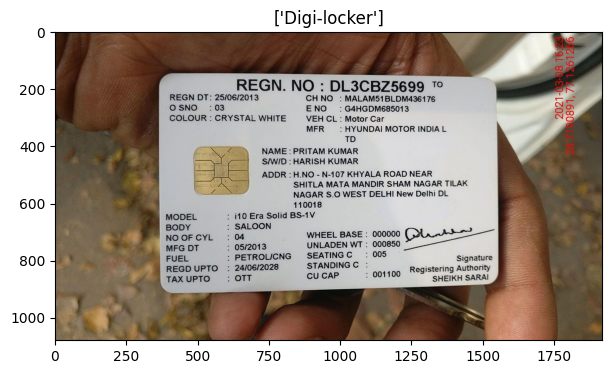

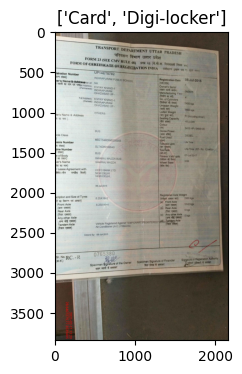

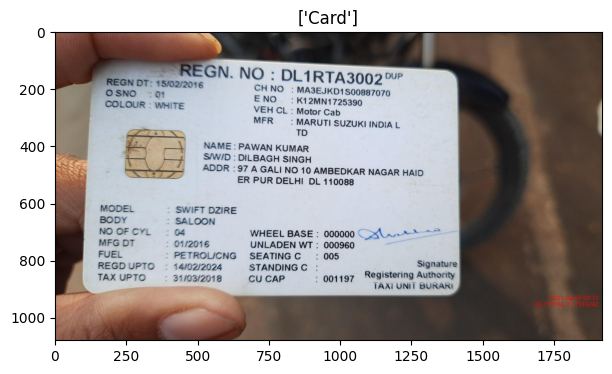

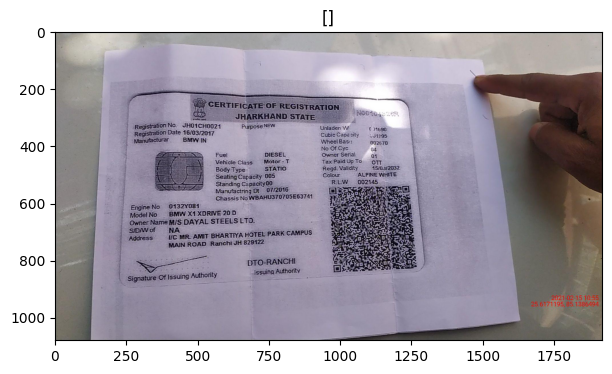

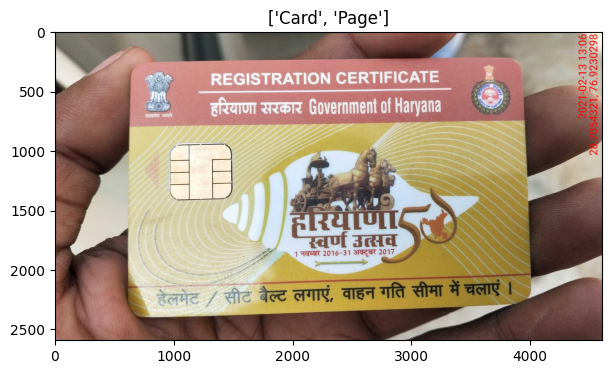

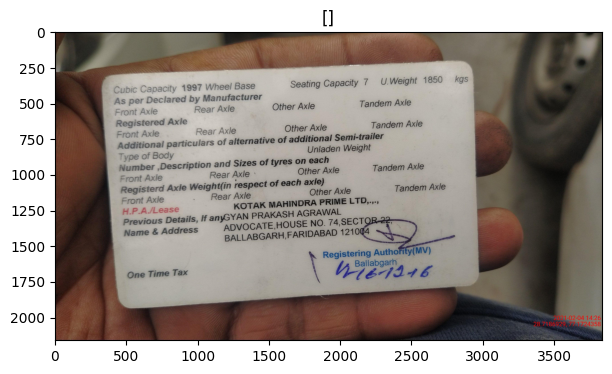

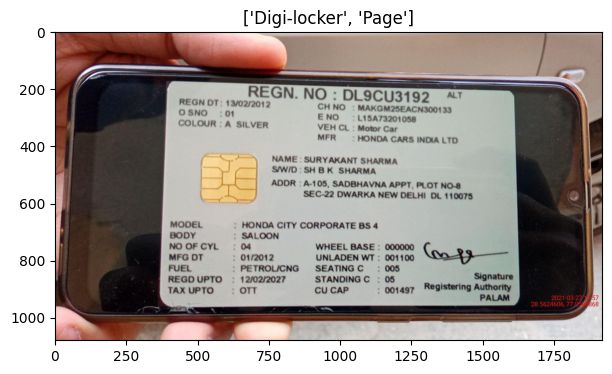

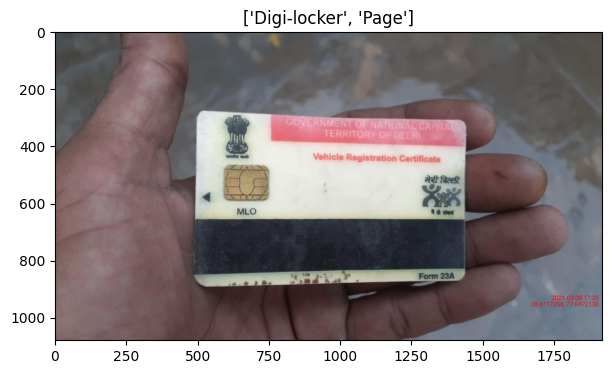

In [98]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
titles = ["008e6476-ec4d-428a-ab68-69b022286d08_820291.jpg",
          "008e6476-ec4d-428a-ab68-69b022286d08_820299.jpg",
          "02c19447-c4c8-4945-9116-6d232d5308e7_819485.jpg",
          "03029226-766f-4abd-b5a2-28ede51bcced_819460.jpg",
          "92d0d2a9-6f02-43ac-a460-2aed85786a1a_821446.jpg",
          "69ff563b-ccc3-4c66-aaf3-64f4656e7a40_817463.jpg",
         "7ecf4700-492a-44fb-8335-e9b1f1e69104_820997.jpg",
         "a5081444-da42-472c-b1de-409d19322c3e_820142.jpg",
         "557c27d9-06cb-47ac-8067-b3a3c964cff5_819755.jpg",
         "365faade-07eb-4385-82bb-7e904c544006_819479.jpg",
         "d9d995b5-f134-427d-9ae1-b655397f00cf_819039.jpg",]

for t in titles:
    show_prediction(t, df, model)